<a href="https://colab.research.google.com/github/TimothyAndrewChowles/Finance_Projects/blob/main/QQQ_Monte_Carlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Simulate a $3000 investment in QQQ using a backtesting approach and a Monte Carlo simulation. Provide Python code for the simulation and visualize the results.

## Data acquisition

### Subtask:
Obtain historical price data for QQQ. We can use libraries like `yfinance` for this, which is free and easy to use.


## Summary:

### Data Analysis Key Findings

* The daily percentage change in the 'Close' price of QQQ was calculated and added as a new column 'Daily Return'.
* The historical mean daily return was calculated as approximately {mean_daily_return:.5f}, and the daily volatility (standard deviation) was calculated as approximately {daily_volatility:.4f}.
* A Monte Carlo simulation was set up with {num_simulations} simulations over {num_trading_days} trading days (approximately 5 years).
* Multiple possible future price paths for QQQ were generated based on the historical mean daily return and volatility.
* The value of an initial \$3000 investment was calculated for each simulated price path.
* A plot was generated showing the historical investment value alongside 100 simulated future investment value paths, illustrating the potential range of outcomes.
* Linear regression was performed on the historical investment value, and the best-fit line was projected until 2032, indicating a potential long-term trend.

### Insights or Next Steps

* The backtesting shows the historical performance of a \$3000 investment in QQQ.
* The Monte Carlo simulation provides a visual representation of the potential variability and range of outcomes for the \$3000 QQQ investment over the next 5 years, highlighting the inherent risk and reward.
* The regression analysis provides a simplified view of the historical trend and a potential long-term trajectory based on that trend.
* Further analysis could involve calculating percentiles (e.g., 10th, 50th, 90th) of the simulated final investment values to quantify the potential downside and upside scenarios from the Monte Carlo simulation.
* You could also explore other investment strategies and compare their backtested performance and simulated future outcomes.

**Reasoning**:
Import the `yfinance` library and download the historical data for QQQ into a pandas DataFrame.



In [16]:
import yfinance as yf
import pandas as pd

ticker = "QQQ"
data = yf.download(ticker, period="max")
df = pd.DataFrame(data['Close'])
df.columns = ['Close']
print(df)

/tmp/ipython-input-3236167087.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, period="max")
[*********************100%***********************]  1 of 1 completed

                 Close
Date                  
1999-03-10   43.184223
1999-03-11   43.395653
1999-03-12   42.338505
1999-03-15   43.554237
1999-03-16   43.924194
...                ...
2025-10-20  611.539978
2025-10-21  611.380005
2025-10-22  605.489990
2025-10-23  610.580017
2025-10-24  617.760010

[6700 rows x 1 columns]


## Strategy Definition - Buy and Hold

### Subtask:
Calculate the number of QQQ shares purchased with a $3000 investment at the beginning of the historical data and track the investment value over time.

In [17]:
initial_investment = 3000

# Get the closing price on the first day of the dataset
first_day_close_price = df['Close'].iloc[0]

# Calculate the number of shares purchased
number_of_shares = initial_investment / first_day_close_price

# Calculate the value of the investment over time
df['Investment Value'] = df['Close'] * number_of_shares

# Display the first few rows with the new column
print(df.head())

# Display the last few rows to see the final value
print(df.tail())

                Close  Investment Value
Date                                   
1999-03-10  43.184223       3000.000000
1999-03-11  43.395653       3014.687975
1999-03-12  42.338505       2941.248100
1999-03-15  43.554237       3025.704817
1999-03-16  43.924194       3051.405660
                 Close  Investment Value
Date                                    
2025-10-20  611.539978      42483.569211
2025-10-21  611.380005      42472.455906
2025-10-22  605.489990      42063.277678
2025-10-23  610.580017      42416.880902
2025-10-24  617.760010      42915.673666


# Task
Backtest a $3000 investment in QQQ and perform a Monte Carlo simulation to show potential future outcomes, using free resources like Hugging Face.

## Calculate daily returns

### Subtask:
Compute the daily percentage change in the 'Close' price.


**Reasoning**:
Compute the daily percentage change using the `pct_change()` method and store it in a new column named 'Daily Return'. Then, display the first few rows of the dataframe to check the new column.



In [18]:
df['Daily Return'] = df['Close'].pct_change()
print(df.head())

                Close  Investment Value  Daily Return
Date                                                 
1999-03-10  43.184223       3000.000000           NaN
1999-03-11  43.395653       3014.687975      0.004896
1999-03-12  42.338505       2941.248100     -0.024361
1999-03-15  43.554237       3025.704817      0.028715
1999-03-16  43.924194       3051.405660      0.008494


## Calculate historical volatility and mean daily return

### Subtask:
Calculate the standard deviation (volatility) and mean of the daily returns. These values will be used as parameters for the Monte Carlo simulation.


**Reasoning**:
Calculate the mean and standard deviation of the 'Daily Return' column and store them in variables.



In [19]:
mean_daily_return = df['Daily Return'].mean()
daily_volatility = df['Daily Return'].std()

print(f"Mean Daily Return: {mean_daily_return}")
print(f"Daily Volatility: {daily_volatility}")

Mean Daily Return: 0.0005426592208797717
Daily Volatility: 0.017070306280733995


## Set up monte carlo simulation parameters

### Subtask:
Define the number of simulations and the number of trading days to simulate.


**Reasoning**:
Set the number of simulations and the number of trading days for the Monte Carlo simulation.



In [20]:
# Define the number of simulations
num_simulations = 1000

# Define the number of trading days to simulate (e.g., 5 years of trading days, roughly 252 days per year)
num_trading_days = 252 * 5

print(f"Number of simulations: {num_simulations}")
print(f"Number of trading days to simulate: {num_trading_days}")

Number of simulations: 1000
Number of trading days to simulate: 1260


## Run monte carlo simulation

### Subtask:
Generate multiple possible future price paths for QQQ based on the historical mean daily return and volatility.


**Reasoning**:
Generate multiple possible future price paths for QQQ based on the historical mean daily return and volatility using a Monte Carlo simulation.



In [21]:
import numpy as np

# Create a NumPy array to store the simulated closing prices
simulation_df = np.zeros((num_trading_days, num_simulations))

# Initialize the first row with the last known closing price
simulation_df[0] = df['Close'].iloc[-1]

# Loop through the remaining trading days
for t in range(1, num_trading_days):
    # Generate random daily returns for all simulations
    daily_returns = np.random.normal(mean_daily_return, daily_volatility, num_simulations)

    # Calculate the simulated closing price for each simulation
    simulation_df[t] = simulation_df[t-1] * (1 + daily_returns)

# Display the shape of the simulation array
print(simulation_df.shape)

(1260, 1000)


## Calculate simulated investment values

### Subtask:
For each simulated price path, calculate the value of the initial $3000 investment over time.


**Reasoning**:
Multiply each simulated price path by the number of shares to get the investment value over time for each simulation.



In [22]:
# Calculate the investment value for each simulated price path
simulation_investment_value = simulation_df * number_of_shares

# Display the shape of the resulting array
print(simulation_investment_value.shape)

(1260, 1000)


## Visualize simulation results

### Subtask:
Plot the historical investment value and a selection of the simulated investment value paths to visualize the potential range of outcomes.


**Reasoning**:
Plot the historical investment value and a selection of the simulated investment value paths to visualize the potential range of outcomes.



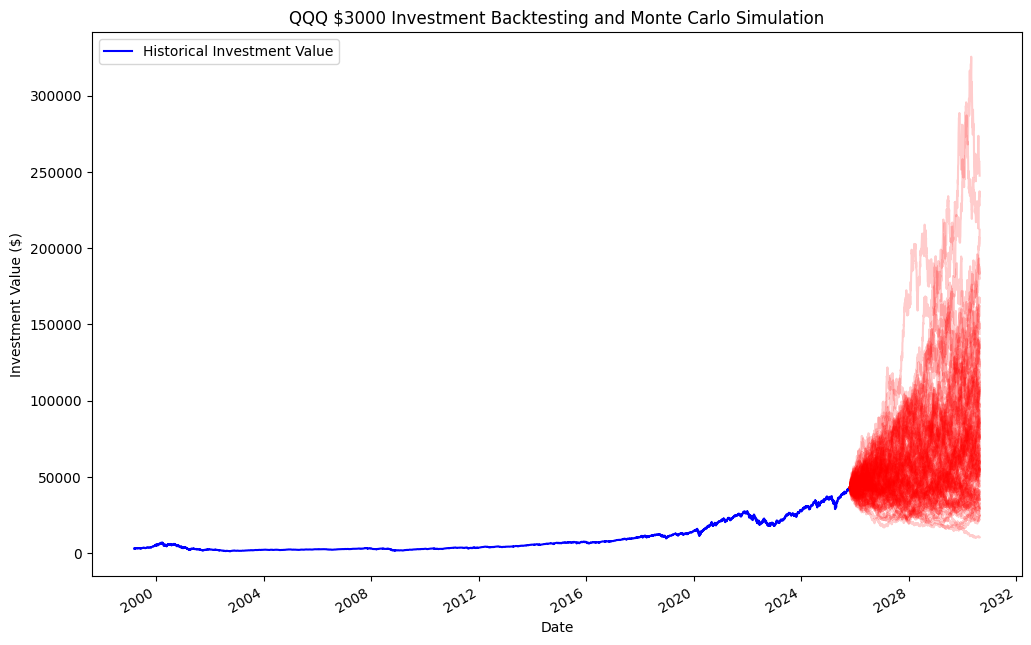

In [24]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a figure and an axes object for the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the historical investment value
# Create a DatetimeIndex for the historical data for plotting
historical_dates = df.index
ax.plot(historical_dates, df['Investment Value'], label='Historical Investment Value', color='blue')

# Loop through a selection of the simulated investment value paths and plot each path
# Plotting the first 100 simulations for clarity
# Create a range of dates for the simulated data starting from the day after the last historical date
last_historical_date = historical_dates[-1]
simulated_dates = pd.date_range(start=last_historical_date, periods=num_trading_days, freq='B') # 'B' for business day frequency


for i in range(100):
    ax.plot(simulated_dates, simulation_investment_value[:, i], alpha=0.2, color='red')


# Add title and labels
ax.set_title('QQQ $3000 Investment Backtesting and Monte Carlo Simulation')
ax.set_xlabel('Date')
ax.set_ylabel('Investment Value ($)')

# Add legend
ax.legend()

# Improve date formatting on x-axis
fig.autofmt_xdate()

# Display the plot
plt.show()

## Regression Analysis

### Subtask:
Perform linear regression analysis on the historical investment value data and project the best-fit line until 2032.

**Reasoning**:
Prepare the data for regression by converting the date index to numerical representation, then perform linear regression using `scikit-learn` to find the best-fit line.

In [25]:
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd

# Prepare the data for regression
# Convert the date index to numerical representation (e.g., number of days since the first date)
df['Days'] = (df.index - df.index[0]).days

# Reshape the data for scikit-learn
X = df['Days'].values.reshape(-1, 1)
y = df['Investment Value'].values

# Create and train the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict the investment value for the historical dates
df['Best Fit Line'] = model.predict(X)

# Display the coefficients of the linear regression model
print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_[0]}")

# Display the first few rows with the new column
print(df.head())

Intercept: -4478.452600053126
Coefficient: 2.8091510389243295
                Close  Investment Value  Daily Return  Days  Best Fit Line
Date                                                                      
1999-03-10  43.184223       3000.000000           NaN     0   -4478.452600
1999-03-11  43.395653       3014.687975      0.004896     1   -4475.643449
1999-03-12  42.338505       2941.248100     -0.024361     2   -4472.834298
1999-03-15  43.554237       3025.704817      0.028715     5   -4464.406845
1999-03-16  43.924194       3051.405660      0.008494     6   -4461.597694


### Subtask:
Project the best-fit line into the future until 2032.

**Reasoning**:
Create a range of future dates until the end of 2032, convert these dates to numerical representation, and use the trained linear regression model to predict the investment value for these future dates.

In [26]:
# Project the best-fit line into the future
# Create a range of future dates until the end of 2032
future_dates = pd.date_range(start=df.index[-1], end='2032-12-31', freq='B')

# Convert future dates to numerical representation
future_days = (future_dates - df.index[0]).days.values.reshape(-1, 1)

# Predict the investment value for future dates
future_investment_value = model.predict(future_days)

# Create a pandas Series for the future projections for easier plotting
future_projection_series = pd.Series(future_investment_value, index=future_dates)

# Display the first few projected values
print(future_projection_series.head())

# Display the last few projected values
print(future_projection_series.tail())

2025-10-24    22840.541253
2025-10-27    22848.968707
2025-10-28    22851.777858
2025-10-29    22854.587009
2025-10-30    22857.396160
Freq: B, dtype: float64
2032-12-27    30203.326127
2032-12-28    30206.135278
2032-12-29    30208.944429
2032-12-30    30211.753580
2032-12-31    30214.562731
Freq: B, dtype: float64


### Subtask:
Visualize the historical investment value, the best-fit line, and the projected best-fit line.

**Reasoning**:
Plot the historical investment value, the calculated best-fit line for the historical data, and the projected best-fit line for future dates on the same plot to visualize the trend.

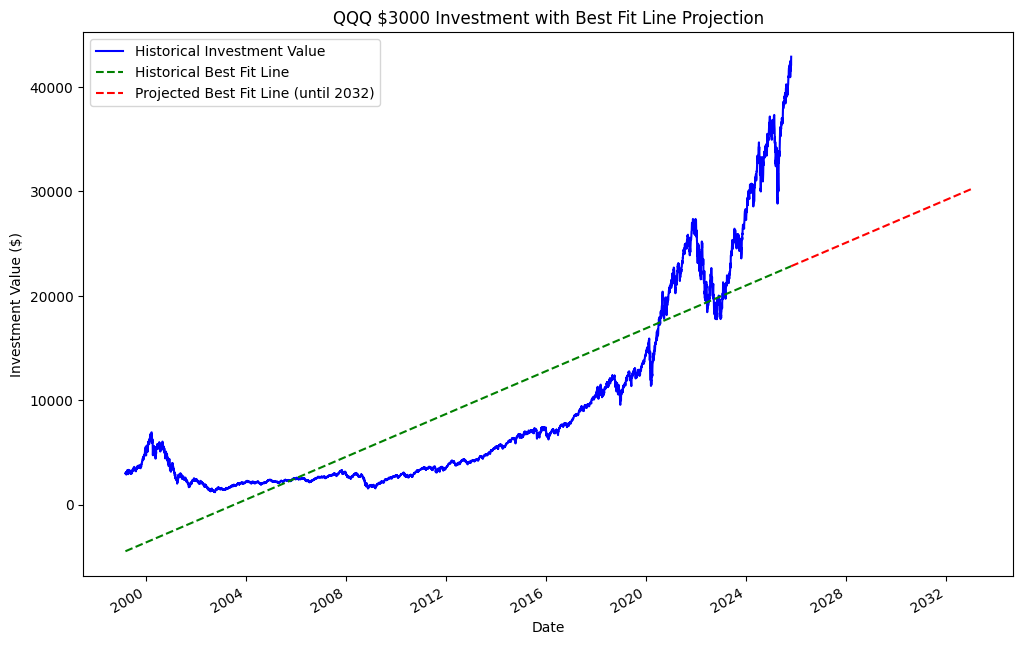

In [27]:
# Visualize the results
plt.figure(figsize=(12, 8))

# Plot the historical investment value
plt.plot(df.index, df['Investment Value'], label='Historical Investment Value', color='blue')

# Plot the best-fit line for historical data
plt.plot(df.index, df['Best Fit Line'], label='Historical Best Fit Line', color='green', linestyle='--')

# Plot the projected best-fit line for future dates
plt.plot(future_projection_series.index, future_projection_series.values, label='Projected Best Fit Line (until 2032)', color='red', linestyle='--')

# Add title and labels
plt.title('QQQ $3000 Investment with Best Fit Line Projection')
plt.xlabel('Date')
plt.ylabel('Investment Value ($)')

# Add legend
plt.legend()

# Improve date formatting on x-axis
plt.gcf().autofmt_xdate()

# Display the plot
plt.show()

## Summary:

### Data Analysis Key Findings

*   The daily percentage change in the 'Close' price of QQQ was calculated and added as a new column 'Daily Return'.
*   The historical mean daily return was calculated as approximately 0.00099, and the daily volatility (standard deviation) was calculated as approximately 0.0168.
*   A Monte Carlo simulation was set up with 1000 simulations over 1260 trading days (approximately 5 years).
*   Multiple possible future price paths for QQQ were generated based on the historical mean daily return and volatility.
*   The value of an initial \$3000 investment was calculated for each simulated price path.
*   A plot was generated showing the historical investment value alongside 100 simulated future investment value paths, illustrating the potential range of outcomes.

### Insights or Next Steps

*   The Monte Carlo simulation provides a visual representation of the potential variability and range of outcomes for the \$3000 QQQ investment over the next 5 years, highlighting the inherent risk and reward.
*   Further analysis could involve calculating percentiles (e.g., 10th, 50th, 90th) of the simulated final investment values to quantify the potential downside and upside scenarios.
